In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def init(n0,n1,n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2,n1)
    b2 = np.zeros((n2, 1))
    param = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    return param

In [29]:
def forward_propagation(X,param):
    Z1 = param['W1'].dot(X) + param['b1']
    A1 = 1/(1+np.exp(-Z1))
    Z2 = param['W2'].dot(A1) + param['b2']
    A2 = 1/(1+np.exp(-Z2))
    acti = {'A1' : A1, 'A2' : A2}
    return acti

In [30]:
#def log_loss(A,y): #----> fonction cout
#    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [31]:
def back_propagatio(X,y,acti,param):
    dZ2 = acti['A2'] - y
    dW2 = 1/y.shape[1] * dZ2.dot(acti['A1'].T)
    db2 = 1/y.shape[1] * np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = np.dot(param['W2'].T, dZ2) * acti['A1'] * (1 - acti['A1'])
    dW1 = 1/y.shape[1] * dZ1.dot(X.T)
    db1 = 1/y.shape[1] * np.sum(dZ1, axis=1,keepdims=True)
    gradients = {'dW1': dW1,'db1': db1,'dW2': dW2,'db2': db2}
    
    return gradients

In [32]:
def update(gradients, param,learning_rate):
    param['W1'] = param['W1'] - learning_rate * gradients['dW1']
    param['b1'] = param['b1'] - learning_rate * gradients['db1']
    param['W2'] = param['W2'] - learning_rate * gradients['dW2']
    param['b2'] = param['b2'] - learning_rate * gradients['db2']
    
    return param

In [33]:
def predict(X,param):
    acti = forward_propagation(X, param)
    return acti['A2'] >= 0.5

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [35]:
#def neural_network(X_train,y_train,n1=2,learning_rate=0.1,n_iter=100):
def neural_network(X_train,y_train,X_test,y_test,n1,learning_rate=0.1,n_iter=100):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    #np.random.seed(0)
    param = init(n0,n1,n2)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        acti = forward_propagation(X_train, param)
        gradients = back_propagatio(X_train,y_train,acti,param)
        param = update(gradients,param,learning_rate)
        if i%10 == 0:
            train_loss.append(log_loss(y_train.flatten(), acti['A2'].flatten()))
            train_acc.append((accuracy_score(y_train.flatten(),predict(X_train, param).flatten())))

            A_test = forward_propagation(X_test,param)
            test_loss.append(log_loss(y_test.flatten(), A_test['A2'].flatten()))
            test_acc.append((accuracy_score(y_test.flatten(),predict(X_test, param).flatten())))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    return param
    

In [36]:
from sklearn.datasets import make_circles


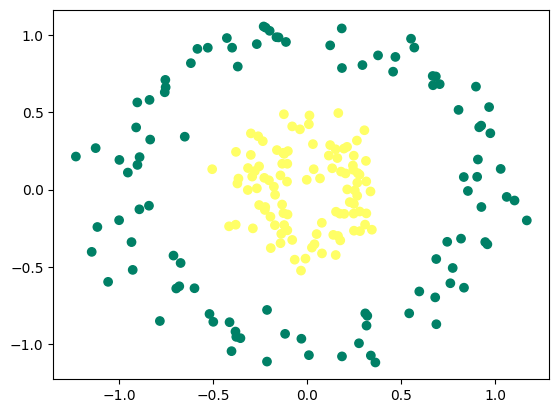

In [37]:
X, y = make_circles(n_samples=200, noise=0.1,factor=0.3,random_state=0)
X = X.T
y = y.reshape((1,y.shape[0]))

plt.scatter(X[0,:],X[1,:], c=y,cmap='summer')
plt.show()

In [38]:
#neural_network(X,y,8,0.1,10000)

In [39]:
from utilities import *

In [40]:
X_train, y_train, X_test, y_test = load_data()

In [41]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

In [42]:
X_train_reshape = X_train_reshape.T
X_test_reshape = X_test_reshape.T
y_train = y_train.T
y_test = y_test.T

100%|██████████| 1000/1000 [00:19<00:00, 51.68it/s]


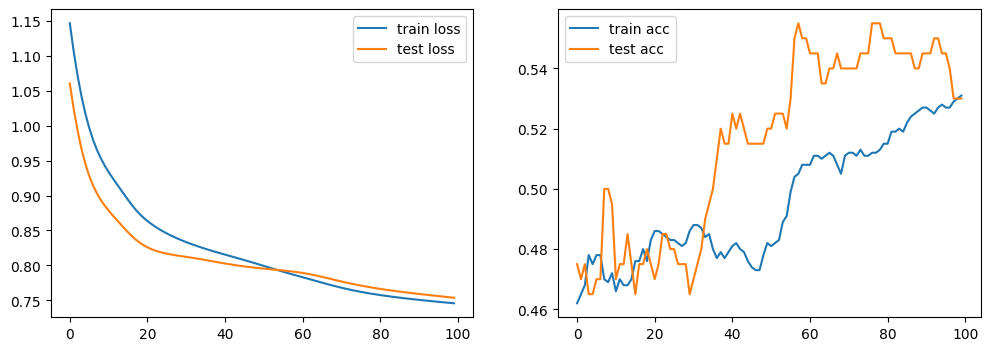

{'W1': array([[-0.55176548, -1.46650542, -0.93695587, ...,  0.94093445,
          0.53047952, -0.59148302],
        [ 1.08370757,  0.49675381, -0.06881401, ..., -1.12874154,
          1.36259293, -0.13105373],
        [ 0.2337516 , -2.20887907,  0.72341494, ...,  1.46881324,
         -0.71651727, -0.20734065],
        ...,
        [-0.53737248, -0.39873488, -0.28071911, ..., -1.00718459,
         -0.99778894, -2.19390836],
        [-0.53091382, -0.93824953, -0.04129464, ..., -0.76032461,
         -1.34526078, -0.52064223],
        [-0.52867925,  0.57463799, -0.7734586 , ..., -1.54432384,
         -0.33481795, -0.11154239]]),
 'b1': array([[ 2.39449496e-03],
        [ 1.00882028e-02],
        [ 3.60581704e-03],
        [ 3.35371724e-04],
        [-1.45161482e-03],
        [-6.72912862e-04],
        [ 1.06470022e-02],
        [ 1.02209828e-02],
        [ 4.38425745e-03],
        [ 2.25606424e-04],
        [-7.74057749e-05],
        [ 3.43735745e-03],
        [-1.56930322e-04],
        [ 

In [44]:
neural_network(X_train_reshape, y_train, X_test_reshape, y_test,16,0.01,1000)